# Text Based Sentiment Analysis

# IMPORTING NECESSARY MODULES

In [1]:
import numpy as np # For linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # For Visualisation
%matplotlib inline
import seaborn as sns  # For Visualisation
from bs4 import BeautifulSoup  # For Text Parsing

# IMPORTING DATASET

In [2]:
data = pd.read_csv('Reviews.csv')
# data

# DATA PREPROCESSING & VISUALISATION

In [3]:
#data.isnull().sum()

In [4]:
data=data.dropna()
#data.isnull().sum()

In [5]:
#data.shape

In [6]:
score_unique = data['Score'].unique()
#print(score_unique)

In [7]:
#   0-> NEGATIVE REVIEW
#   1-> NEUTRAL REVIEW
#   2-> POSTIVE REVIEW
a=[]
for i in data['Score']:
    if i <3:                              
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

In [8]:
r_0, r_1, r_2 = 0, 0, 0
for i in a:
    if i == 0:
        r_0 += 1
    elif i == 1:
        r_1 += 1
    else:
        r_2 += 1

print('Negative Reviews:',r_0)
print('Neutral Reviews:',r_1)
print('Positive Reviews:',r_2)

Negative Reviews: 82007
Neutral Reviews: 42638
Positive Reviews: 443766


c:\Users\Sriniketh J\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


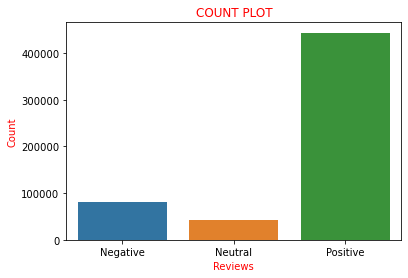

In [9]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [10]:
data['sentiment']=a
#data
final_dataset = data[['Text','sentiment']]
#final_dataset

In [11]:
data_p=final_dataset[data['sentiment']==2]
data_n=final_dataset[data['sentiment']==0]
#len(data_p), len(data_n)

In [12]:
datap = data_p.iloc[np.random.randint(1,443766,5000), :]
datan = data_n.iloc[np.random.randint(1, 82007,5000), :]
#len(datan), len(datap)

In [13]:
data = pd.concat([datap,datan])
len(data)

10000

In [14]:
c=[]
for i in data['sentiment']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']=c

c:\Users\Sriniketh J\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


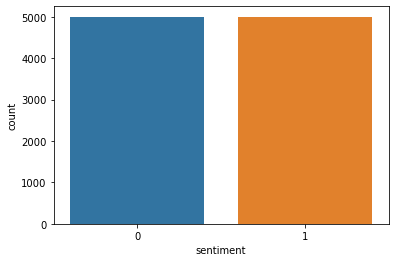

In [15]:
sns.countplot(data['sentiment'])
plt.show()

In [16]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review'] = data['Text'].apply(strip_html)

data=data.drop('Text',axis=1)

#data.head()

# MODEL BUILDING

In [17]:
import nltk  #Natural Language Processing Toolkit
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
#data.head(2)

In [18]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
#data['review'] = data['review'].apply(remove_stopword)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['review'])

vect_X = vectr.transform(data['review'])

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

clf=model.fit(vect_X,data['sentiment'])
#clf.score(vect_X,data['sentiment'])*100

# PREDICTION

In [ ]:
def prediction(comments):
    """
    This function is used to get the prediction of a comment.
    """
    sentiment = ;
    if (clf.predict(vectr.transform([comments]))):
        return "Positive Comment😊"
    else:
        return "Negative Comment😞"

In [31]:
clf.predict(vectr.transform(['''Nice look and build quality with moderately fast everything such as refresh rate, display quality, sound, processing, gaming experience and many more ..
I didn't find any lagging or heating issue..And battery health I won't say great but I'll take that Only cons I can say about it is camera.. sharpening picture a little much at day light and low light photo you have to compromise.''']))

array([1], dtype=int64)

In [32]:
clf.predict(vectr.transform(['''Phone has bugs , and screen quality is poor , Avoid realme. Gaming was just over hyped''']))

array([0], dtype=int64)

In [33]:
clf.predict(vectr.transform(['''No lags found super speed and very good performance nice phone in this budget''']))

array([1], dtype=int64)